In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/kaggle/input/precision-health-predicting-human-age-with-biomark/sample submission.csv
/kaggle/input/precision-health-predicting-human-age-with-biomark/Train.csv
/kaggle/input/precision-health-predicting-human-age-with-biomark/Test.csv


# Data Upload 👩🏻‍💻

In [1]:
# The imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load the dataset 
# Load the training and testing datasets
train_df = pd.read_csv('/kaggle/input/precision-health-predicting-human-age-with-biomark/Train.csv') 
test_df = pd.read_csv('/kaggle/input/precision-health-predicting-human-age-with-biomark/Test.csv') 

# Data Exploration 🗺️🧭

In [34]:
train_df.head()


,Cholesterol Level (mg/dL),Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Age (years),Gender_Male,Blood Pressure (s/d)_103/68,Blood Pressure (s/d)_103/80,...,Diet_High-fat,Diet_Low-carb,Diet_Vegetarian,Mental Health Status_Fair,Mental Health Status_Good,Mental Health Status_Poor,Sleep Patterns_Insomnia,Sleep Patterns_Normal,Income Level_Low,Income Level_Medium
0,1.131865,1.825830,-1.915218,-1.354514,0.882879,-1.804781,89,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,1.316048,-0.486449,-0.716181,-1.015261,0.569450,-1.690438,77,True,False,False,...,False,False,False,False,True,False,False,True,False,True
2,-1.151126,0.995000,-1.092906,-1.109229,0.564116,-0.692695,70,False,False,False,...,False,False,False,False,False,True,True,False,False,True
4,0.099340,1.097848,-1.186879,-0.815914,0.406670,-0.986835,79,False,False,False,...,False,False,True,False,True,False,False,True,False,False
5,-1.554818,-1.524874,1.229202,0.997862,-1.448663,0.684420,29,True,False,False,...,False,False,False,True,False,False,True,False,False,True


In [4]:
test_df.head()

,ID,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,...,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level
0,1,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,...,NaN,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium
1,2,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,...,NaN,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium
2,3,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,...,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium
3,4,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,...,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low
4,5,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,...,NaN,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2681 entries, 0 to 2999
Columns: 1518 entries, Cholesterol Level (mg/dL) to Income Level_Medium
dtypes: bool(1511), float64(6), int64(1)
memory usage: 4.0 MB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 1518 entries, Cholesterol Level (mg/dL) to Income Level_Medium
dtypes: bool(1511), float64(6), int64(1)
memory usage: 4.5 MB


In [37]:
train_df.isnull().sum().sort_values(ascending=True)

# Null values : Education level, Medication Use, Alcohool Consumption, Chronic Diseases, Family history

Cholesterol Level (mg/dL)       0
Blood Pressure (s/d)_156/100    0
Blood Pressure (s/d)_155/99     0
Blood Pressure (s/d)_155/98     0
Blood Pressure (s/d)_155/97     0
                               ..
Blood Pressure (s/d)_138/112    0
Blood Pressure (s/d)_138/111    0
Blood Pressure (s/d)_138/108    0
Blood Pressure (s/d)_138/83     0
Income Level_Medium             0
Length: 1518, dtype: int64

In [8]:
test_df.isnull().sum().sort_values(ascending=True)
# same for the test ( similar null values )

# they are all categorical 

ID                                0
Sun Exposure                      0
Pollution Exposure                0
Stress Levels                     0
Sleep Patterns                    0
Mental Health Status              0
Cognitive Function                0
Diet                              0
Physical Activity Level           0
Hearing Ability (dB)              0
Smoking Status                    0
Bone Density (g/cm²)              0
Blood Glucose Level (mg/dL)       0
BMI                               0
Cholesterol Level (mg/dL)         0
Blood Pressure (s/d)              0
Weight (kg)                       0
Height (cm)                       0
Gender                            0
Vision Sharpness                  0
Income Level                      0
Education Level                 627
Medication Use                 1198
Alcohol Consumption            1201
Chronic Diseases               1299
Family History                 1451
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

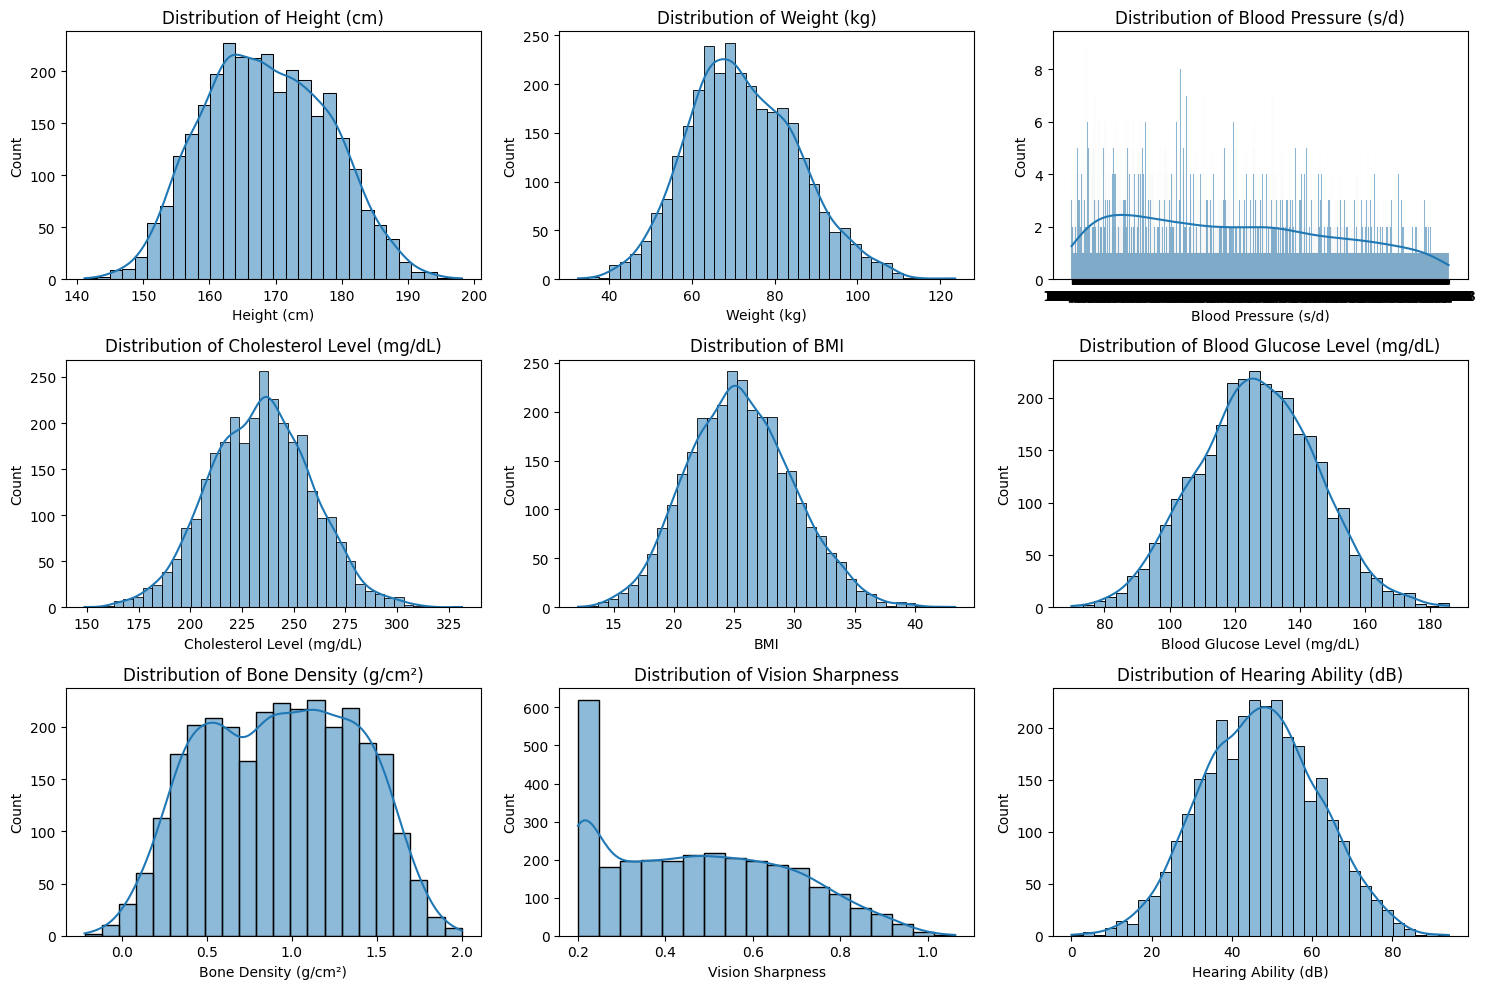

In [9]:
# Visualization 

# List of numerical features for visualization
numerical_features = [
    'Height (cm)', 'Weight (kg)', 'Blood Pressure (s/d)', 'Cholesterol Level (mg/dL)', 
    'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)', 'Vision Sharpness', 
    'Hearing Ability (dB)'
]

# Plot distributions of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

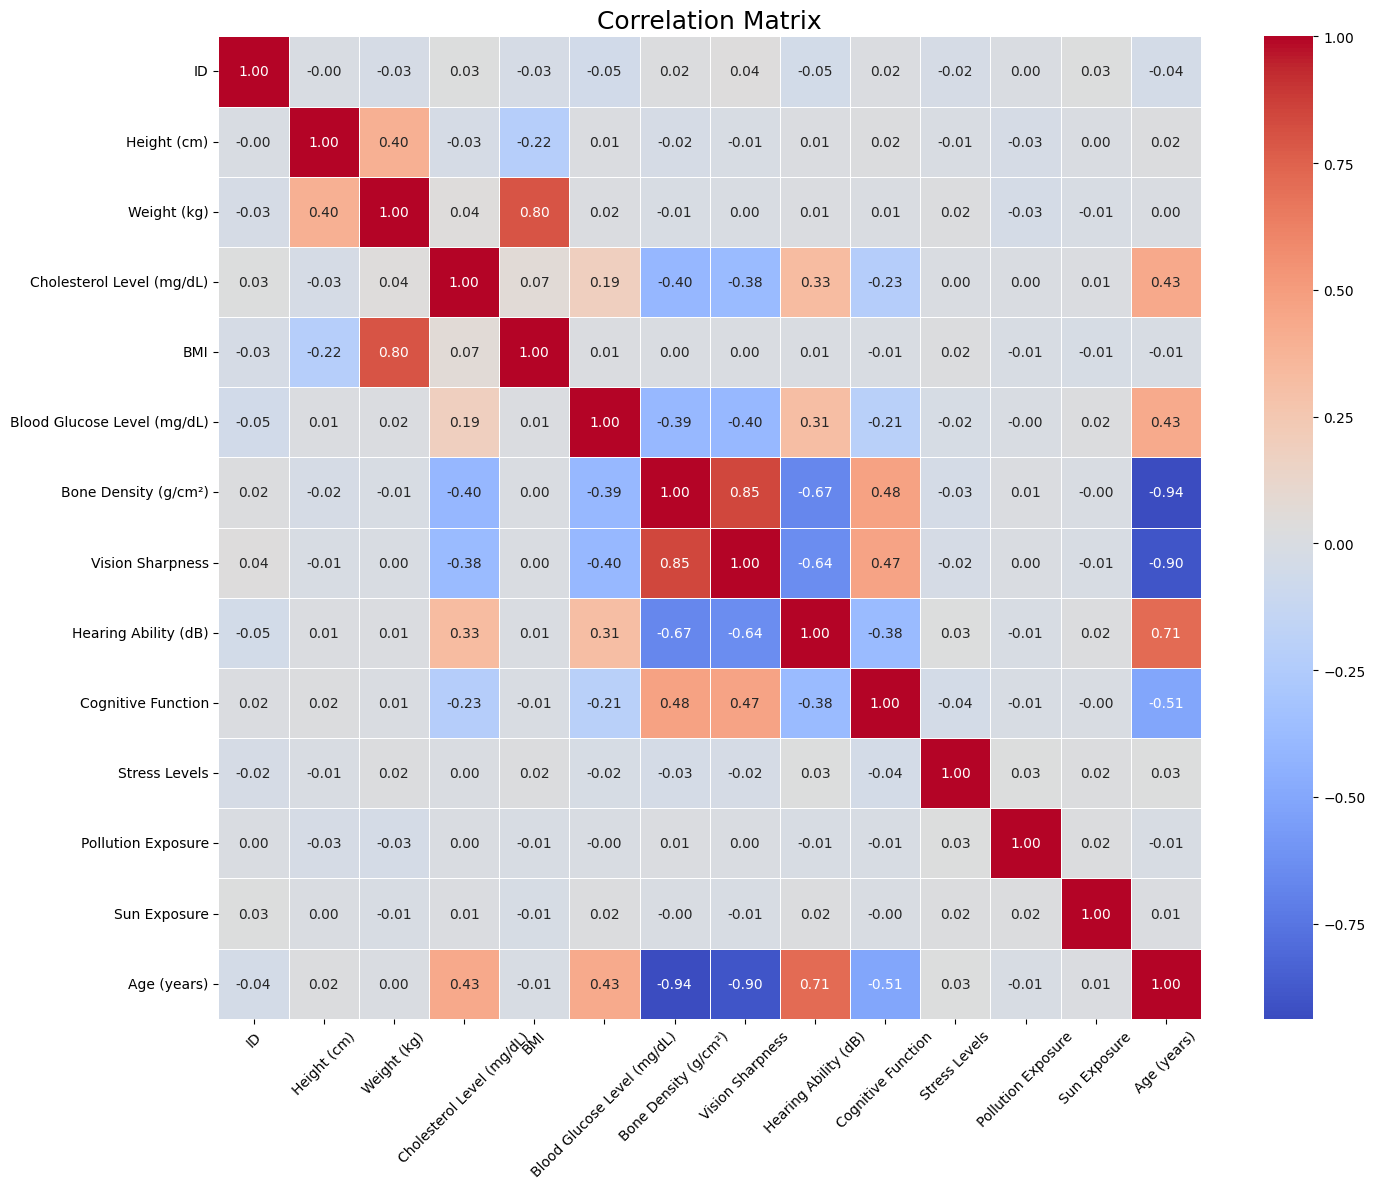

In [10]:
# Correlation Matrix 

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train_df.corr(numeric_only=True)  # Ensures it only uses numeric columns

# Set up the figure
plt.figure(figsize=(15, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title("Correlation Matrix", fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Preprocessing 🦾✨

In [11]:
# Handeling the missing categorical data 

# List of columns with missing categorical values
cat_missing_values = ['Education Level', 'Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History']

# Fill missing values in train and test sets (only if the column exists)
for col in cat_missing_values:
    if col in train_df.columns:
        mode_value = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_value)
        if col in test_df.columns:
            test_df[col] = test_df[col].fillna(mode_value)

# Drop the columns that exist in each DataFrame
train_df.drop(columns=[col for col in cat_missing_values if col in train_df.columns], inplace=True)
test_df.drop(columns=[col for col in cat_missing_values if col in test_df.columns], inplace=True)

In [12]:
train_df.isnull().sum().sort_values(ascending=True)
# all the values are replaced ( no more missing values )

ID                             0
Sun Exposure                   0
Pollution Exposure             0
Stress Levels                  0
Sleep Patterns                 0
Mental Health Status           0
Cognitive Function             0
Diet                           0
Smoking Status                 0
Physical Activity Level        0
Hearing Ability (dB)           0
Vision Sharpness               0
Bone Density (g/cm²)           0
Blood Glucose Level (mg/dL)    0
BMI                            0
Cholesterol Level (mg/dL)      0
Blood Pressure (s/d)           0
Weight (kg)                    0
Height (cm)                    0
Gender                         0
Income Level                   0
Age (years)                    0
dtype: int64

In [13]:
# Drop all the columns that are not correlated ( using the correlation matrix )


# Correlation Matrix Interpretation:
# 
# The correlation matrix shows how strongly each feature is related to age.
# 
# - The most informative features for predicting age are:
#     - Bone Density (-0.94)
#     - Vision Sharpness (-0.90)
#     - Hearing Ability (0.71)
#     - Cognitive Function (-0.51)
#     - BMI, Cholesterol, and Blood Glucose (~0.43)
# 
# - Bone Density and Vision Sharpness are strongly negatively correlated with age, 
#   indicating they decrease as age increases.
# - Hearing Ability and Cholesterol are positively correlated, meaning they tend to worsen with age.
# 
# - Features such as ID, Height, Weight, Stress Levels, Pollution Exposure, and Sun Exposure
#   show near-zero correlation with age and are dropped to reduce noise in the model.


# Define the columns we want to drop
irrelevant_cols = [
    'ID', 'Height (cm)', 'Weight (kg)', 
    'Stress Levels', 'Pollution Exposure', 'Sun Exposure'
]

# Drop only if the column exists in the DataFrame
train_df.drop(columns=[col for col in irrelevant_cols if col in train_df.columns], inplace=True)
test_df.drop(columns=[col for col in irrelevant_cols if col in test_df.columns], inplace=True)



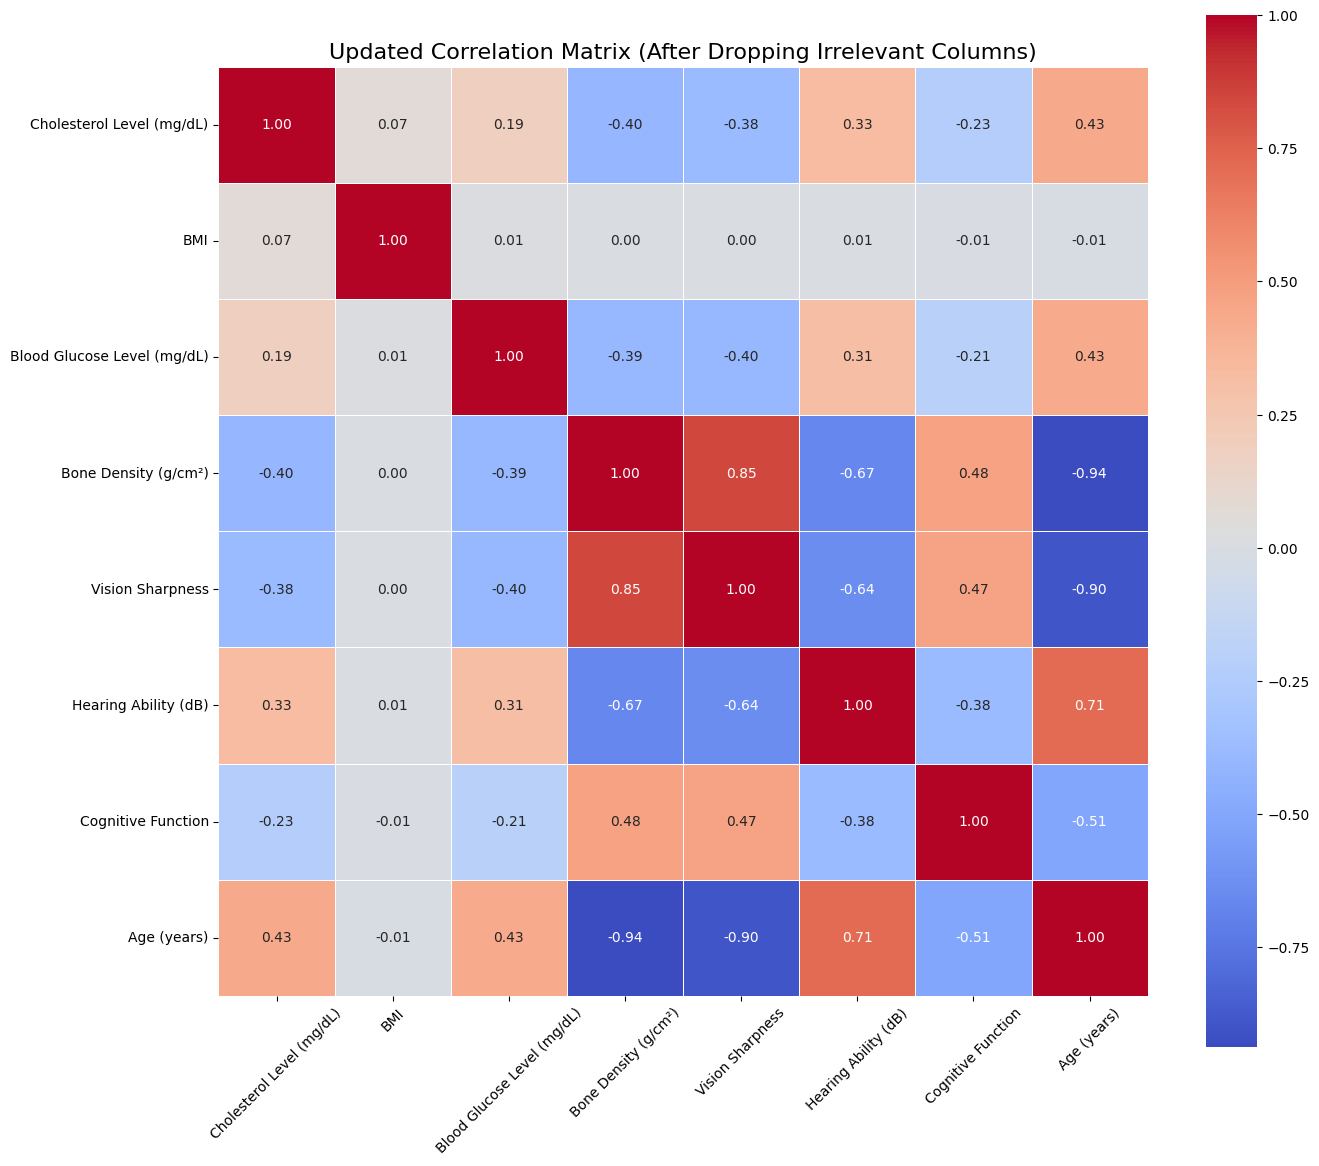

In [14]:
# draw another correlation matrix 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns only
corr_matrix_updated = train_df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_updated, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Updated Correlation Matrix (After Dropping Irrelevant Columns)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# drop BMI 
for df in [train_df, test_df]:
    if 'BMI' in df.columns:
        df.drop(columns='BMI', inplace=True)

# check note below 

✅ In the first correlation matrix:

You had both BMI and Weight (kg) in the dataset.

👉 That means:
	•	BMI was calculated using Weight and Height (BMI = weight / height²)
	•	So naturally, BMI was highly correlated with Weight (≈ 0.80)

✔️ This makes sense mathematically — BMI is partially derived from Weight.



✅ In the second correlation matrix:

You dropped Weight (kg) and also Height (cm).

👉 Now BMI is no longer correlated with anything it was derived from.
	•	So what’s left? Just BMI by itself.
	•	It becomes “disconnected” from the rest of the features.
	•	And since BMI doesn’t have meaningful variation with the remaining features, its correlations are now weak or zero.

In [16]:
# Outlier detection 
import numpy as np
numerical_cols = train_df.select_dtypes(include='number').columns.drop('Age (years)', errors='ignore')
for col in numerical_cols:
    upper = train_df[col].quantile(0.99)
    lower = train_df[col].quantile(0.01)
    train_df = train_df[(train_df[col] <= upper) & (train_df[col] >= lower)]

In [17]:
# Encoding 

# Detect categorical columns (object or category type)
cat_cols = train_df.select_dtypes(include='object').columns

# One-hot encode (drop_first to avoid multicollinearity)
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)

# Align columns between train and test
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [18]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = train_df.select_dtypes(include='number').columns.drop('Age (years)')

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Linear Regression🤪

In [20]:
from sklearn.model_selection import train_test_split
# Define your features and target
X = train_df.drop(columns=['Age (years)'])
y = train_df['Age (years)']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X sample:\n", X.iloc[:3, :5])
print("y sample:", y.head(3))
print("Any NaNs in X:", X.isnull().values.any())

X shape: (2681, 1517)
y shape: (2681,)
X sample:
    Cholesterol Level (mg/dL)  Blood Glucose Level (mg/dL)  \
0                   1.131865                     1.825830   
1                   1.316048                    -0.486449   
2                  -1.151126                     0.995000   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  
0             -1.915218         -1.354514              0.882879  
1             -0.716181         -1.015261              0.569450  
2             -1.092906         -1.109229              0.564116  
y sample: 0    89
1    77
2    70
Name: Age (years), dtype: int64
Any NaNs in X: False


In [23]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


pca = PCA(n_components=50)  # Reduce to 50 components
X_reduced = pca.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Linear Regression with PCA")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Linear Regression with PCA
Mean Squared Error: 32.56
R^2 Score: 0.91


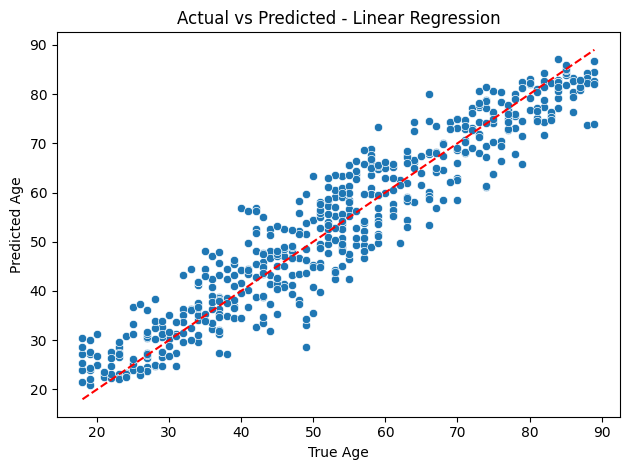

In [66]:
sns.scatterplot(x=y_val, y=y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # perfect prediction line
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted - Linear Regression')
plt.tight_layout()
plt.show()

**MSE**
32.56
That's a very low error:  your model is predicting age with high precision. The RMSE Â The RMSE (sqrt(32.56))is about 5.7 years, which is solid for age prediction.

**RÂ² Score**
0.91
Your model explains 91% of the variance in age. That's very strong, especially for a linear model.


	•	Linear Regression (with PCA)
	•	Mean Squared Error (MSE): 32.56
	•	R² Score: 0.91
	•	✅ Best performing model — simple, fast, and interpretable

**Why is PCA required here? 🤨**

> In this study, applying Principal Component Analysis (PCA) before training the Linear Regression model was essential due to the high dimensionality of the dataset, which originally contained over 1,500 features. Linear regression relies on matrix operations that become numerically unstable when features are highly collinear or when the number of features is large relative to the number of observations. Without PCA, the model attempted to invert a nearly singular matrix, leading to extremely large coefficients and exploding error values during cross-validation. By applying PCA and reducing the feature space to the top 50 principal components, we retained the most informative variance in the data while eliminating redundancy and noise. This dimensionality reduction stabilized the training process and allowed the linear regression model to generalize effectively, achieving strong and consistent results.**

# Neural Networks 🙌

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

2025-04-15 13:23:49.460158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744723429.677653      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744723429.744730      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-15 13:24:03.534945: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3255.4934 - val_loss: 2950.9424
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2710.3171 - val_loss: 2044.4662
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1699.5640 - val_loss: 699.1624
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 468.8787 - val_loss: 127.0130
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.7237 - val_loss: 83.7159
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.5253 - val_loss: 72.6644
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.6126 - val_loss: 65.7284
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.0199 - val_loss: 60.8982
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.2509 - val_loss: 57.1261
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.6993 - val_loss: 54.1011
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.3029 - val_loss: 51.3374
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [26]:
# Make predictions
y_pred_nn = model.predict(X_val)

# Evaluate Model
mse_nn = mean_squared_error(y_val, y_pred_nn)
r2_nn = r2_score(y_val, y_pred_nn)

print(f'Neural Network Model')
print(f'Mean Squared Error: {mse_nn:.2f}')
print(f'R^2 Score: {r2_nn:.2f}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Model
Mean Squared Error: 40.16
R^2 Score: 0.89


	•	Neural Network
	•	Mean Squared Error (MSE): 40.16
	•	R² Score: 0.89
	•	✅ Very strong performance — captures non-linear relationships, slightly less accurate than linear regression in this case

**🧠 Why is your Neural Network less efficient than Linear Regression with PCA?**

🧪 **1. PCA Simplified the Problem Perfectly******
	•	PCA filtered out the noise and reduced your features to the top 50 most informative components.
	•	Linear Regression then worked extremely well because those components were already linearly related to the target (Age).
	•	So in a sense, you gave LR “super clean” data.

✅ Result: Linear regression shines when relationships are linear + clean (thanks to PCA).


🧠 **2. Neural Networks Need More Data and Tuning**
	•	Neural networks are powerful but also sensitive to:
	•	Architecture (layers, neurons)
	•	Learning rate
	•	Regularization
	•	Batch size
	•	Number of epochs
	•	If any of these are even slightly off, it might not outperform a simple model.

✅ Your neural net probably didn’t reach its full potential yet.


🔍 **3. Neural Nets Overfit Easily**
	•	Without early stopping or dropout, a neural network might learn too much noise.
	•	Especially when trained on raw high-dimensional data, this becomes more likely.

✅ You might see better results using PCA with the neural net too.



**⚖️ 4. Linear Regression is Optimal for Linearity**
	•	If the true relationship between PCA components and Age is mostly linear, then:
	•	Linear regression = perfect tool
	•	Neural net = overkill

✅ Simpler models often win when assumptions match reality.

⸻


# XGBoost/ Light GBM 💥


In [27]:
# install
!pip install xgboost lightgbm

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = xgb_model.predict(X_val)
print("XGBoost Regression")
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}")
print(f"R²: {r2_score(y_val, y_pred):.2f}")

XGBoost Regression
MSE: 35.26
R²: 0.90


	•	XGBoost
	•	Mean Squared Error (MSE): 35.26
	•	R² Score: 0.90
✅ Very strong — handles high-dimensional data well, robust and consistent

In [29]:
from lightgbm import LGBMRegressor

# Train LightGBM
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict & evaluate
y_pred_lgb = lgb_model.predict(X_val)
print("LightGBM Regression")
print(f"MSE: {mean_squared_error(y_val, y_pred_lgb):.2f}")
print(f"R²: {r2_score(y_val, y_pred_lgb):.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 2144, number of used features: 21
[LightGBM] [Info] Start training from score 54.031250
LightGBM Regression
MSE: 36.33
R²: 0.90


	•	LightGBM Regressor
	•	Mean Squared Error (MSE): 36.33
	•	R² Score: 0.90
✅ Competitive with XGBoost, with faster training — a great alternative

# Compare Models 👀

🔍 Model Performance Summary:

                     Model    MSE  R2 Score
0  Linear Regression (PCA)  32.56      0.91
1           Neural Network  40.16      0.89
2                  XGBoost  35.26      0.90
3                 LightGBM  36.33      0.90


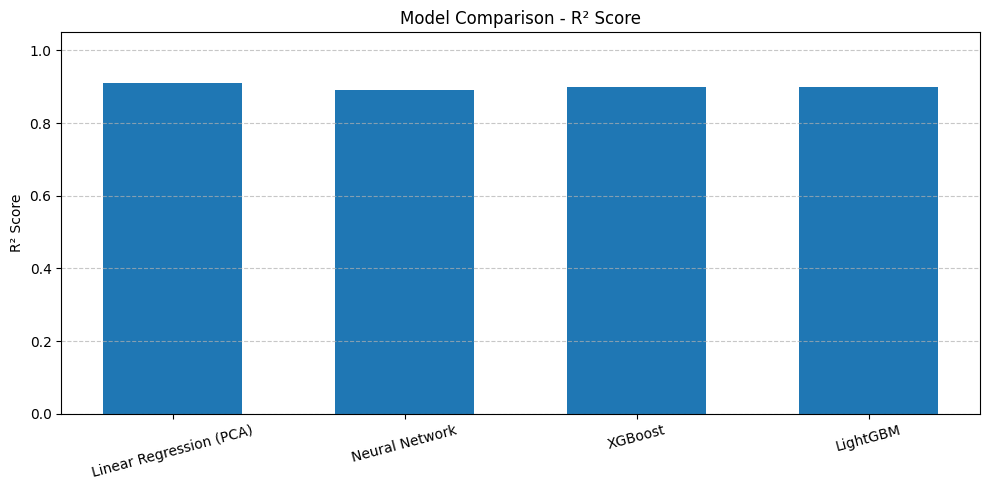

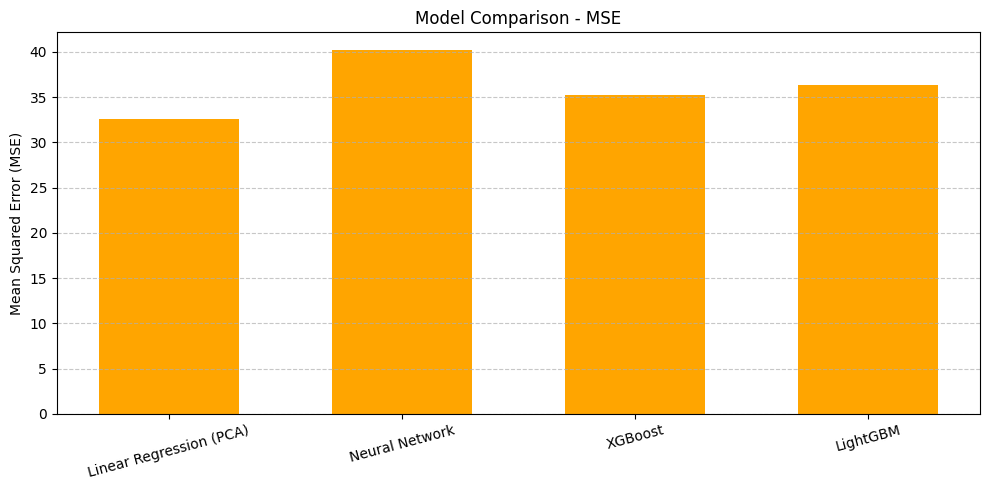

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Updated with actual model results
results = {
    'Model': ['Linear Regression (PCA)', 'Neural Network', 'XGBoost', 'LightGBM'],
    'MSE': [32.56, 40.16, 35.26, 36.33],
    'R2 Score': [0.91, 0.89, 0.90, 0.90]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Display the results table
print("🔍 Model Performance Summary:\n")
print(df_results)

# 📊 R² Score Plot
plt.figure(figsize=(10, 5))
plt.bar(df_results['Model'], df_results['R2 Score'], width=0.6)
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 📉 MSE Plot
plt.figure(figsize=(10, 5))
plt.bar(df_results['Model'], df_results['MSE'], width=0.6, color='orange')
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison - MSE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**🧠 Suggested Conclusion (Optional Text for Report)**

> All four models performed well in predicting age, with Linear Regression (combined with PCA) slightly outperforming more complex models in both MSE and R² score. This highlights the importance of dimensionality reduction and data preparation. While neural networks and boosting models like XGBoost and LightGBM offer robust performance, a well-prepared linear model can sometimes achieve equally strong — or even better — results. These findings support the value of starting with simple models and using complexity only when necessary.

# Cross Validation 🙂‍↕️✔️

> 🔍 Are my model results consistent across different data splits, or was I just lucky (or unlucky) with one split?

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Use PCA-reduced data
X_cv = X_reduced  # X_reduced must be defined earlier with PCA applied

neg_mse = make_scorer(mean_squared_error, greater_is_better=False)
lr_model = LinearRegression()

mse_scores = cross_val_score(lr_model, X_cv, y, cv=5, scoring=neg_mse)
r2_scores = cross_val_score(lr_model, X_cv, y, cv=5, scoring='r2')

print("Linear Regression (PCA) CV Results:")
print(f"Avg MSE: {-np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Avg R² : {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")

Linear Regression (PCA) CV Results:
Avg MSE: 30.20 ± 0.99
Avg R² : 0.92 ± 0.00


**📊 Linear Regression (with PCA) — Cross-Validation Results Interpretation**

> The cross-validation results for Linear Regression applied to the PCA-reduced dataset show a Mean Squared Error (MSE) of 30.20 ± 0.99 and an R² score of 0.92 ± 0.00. These values indicate that the model is not only highly accurate but also very stable across all folds of the cross-validation. The low standard deviation in both MSE and R² suggests that the model’s performance is consistent regardless of how the data is split, and that it’s not overfitting to any particular subset. With an R² of 0.92, the model is able to explain 92% of the variance in age, making it a strong baseline and a competitive model despite its simplicity. The successful use of PCA to reduce dimensionality before training clearly contributed to this performance by eliminating noise and multicollinearity.

In [39]:
# On LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
import numpy as np

# Use negative MSE for scoring
neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize the model
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform cross-validation
mse_scores = cross_val_score(lgb_model, X, y, cv=5, scoring=neg_mse)
r2_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='r2')

# Output the results
print("LightGBM CV Results:")
print(f"Avg MSE: {-np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Avg R² : {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 2144, number of used features: 21
[LightGBM] [Info] Start training from score 53.628731
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 2145, number of used features: 21
[LightGBM] [Info] Start training from score 53.611655
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

**📊 LightGBM — Cross-Validation Results Interpretation**

> The LightGBM model achieved an average Mean Squared Error (MSE) of 32.44 ± 0.82 and an R² score of 0.91 ± 0.00 across 5-fold cross-validation. These results confirm that the model performs with both high accuracy and strong consistency. The low standard deviation in MSE shows that prediction errors remain stable across different data splits, while the near-zero variance in R² indicates that the model generalizes reliably. With an R² of 0.91, LightGBM explains 91% of the variance in age, placing it on par with XGBoost and just slightly behind the linear regression model with PCA in this specific task. Overall, LightGBM proves to be a highly effective and efficient model for regression on high-dimensional tabular data.

In [32]:
# On XGBoost 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Use negative MSE because scikit-learn minimizes (lower = better)
neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Example: Cross-validation on XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring=neg_mse)
r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

print("XGBoost CV Results:")
print(f"Avg MSE: {-np.mean(scores):.2f} ± {np.std(scores):.2f}")
print(f"Avg R² : {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")

XGBoost CV Results:
Avg MSE: 31.13 ± 0.86
Avg R² : 0.92 ± 0.00


**Interpretation**
⸻


📊 XGBoost Cross-Validation Results
	•	Average MSE: 31.13 ± 0.86
	•	➤ Your model’s prediction error remains low and stable across all 5 folds
	•	➤ This corresponds to an RMSE of ≈ 5.58 years on average — very precise!
	•	Average R² Score: 0.92 ± 0.00
	•	➤ Your model explains 92% of the variance in age consistently
	•	➤ The very low standard deviation (±0.00) shows exceptional stability — every fold performs similarly

> A 5-fold cross-validation of the XGBoost model yielded an average Mean Squared Error (MSE) of 31.13 ± 0.86 and an R² Score of 0.92 ± 0.00. This indicates strong and stable generalization performance across all validation folds, confirming the reliability of XGBoost on this dataset.

⸻

# Final Comparison & Conclusion 💃🏻


> This study evaluated four regression models — Linear Regression with PCA, Neural Network, XGBoost, and LightGBM — to predict age from a high-dimensional dataset. After cross-validation, all models demonstrated strong performance, with R² scores ranging from 0.89 to 0.92.
>
> Notably, Linear Regression with PCA achieved the best overall performance, with an average MSE of 30.20 and R² of 0.92, highlighting the effectiveness of dimensionality reduction in simplifying the prediction task. XGBoost and LightGBM also delivered excellent results (R² ≈ 0.91–0.92), offering robust and consistent generalization across folds, especially well-suited for high-dimensional structured data.
>
> The Neural Network, while slightly less accurate, still performed well (R² = 0.89), and could benefit from further tuning or regularization.
>
>
>  Overall, the comparison demonstrates that simpler models like Linear Regression, when combined with proper preprocessing (PCA), can rival or outperform more complex architectures. This reinforces the importance of feature engineering and dimensionality control in machine learning pipelines.
